# 1. Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# 2. Data Collection & Analysis

In [5]:
# loading the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# choosing the features for clustering
# We will use 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
# These features are numerical and suitable for KMeans clustering.
X = df.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# 3. Choosing the number of clusters

In [14]:
# finding the optimal number of clusters using the Elbow method
# The Elbow method helps to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

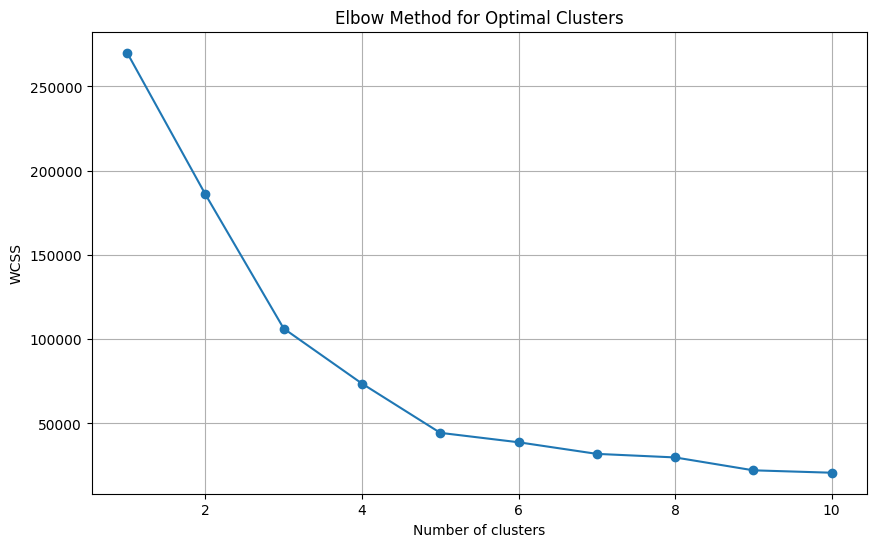

In [15]:
# plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Optimum Number of clusters = 5

# 4. Training the k-Means Clustering Model

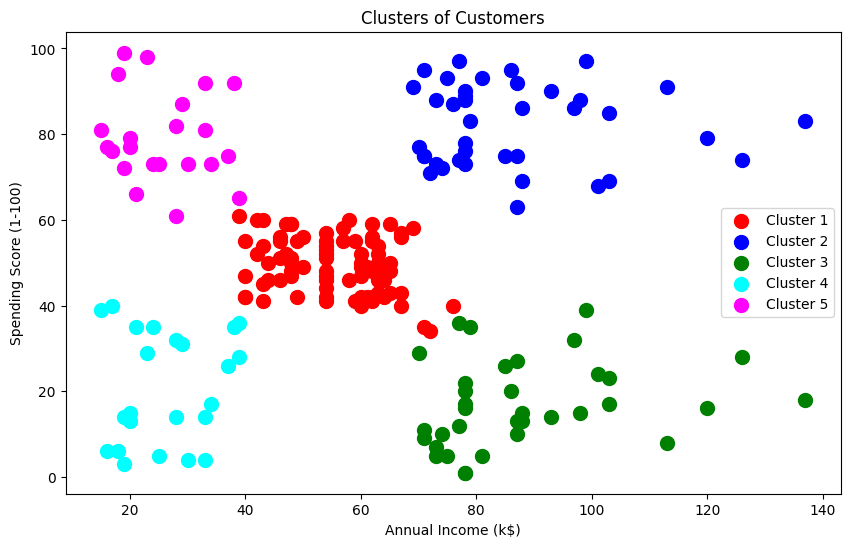

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# returning the labels of the clusters
y_kmeans = kmeans.fit_predict(X)
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')      
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 5. Customer Segmentation Report
### Based on Annual Income vs Spending Score

#### 🔴 Cluster 1 – Average Income, Average Spenders
* Color: Red

* Income: ₹40k – ₹70k

* Spending Score: 40 – 60

* Description: These are stable customers with average income and balanced spending. They are  loyal and consistent buyers.

* Business Tip: Good for long-term promotions, loyalty programs.

#### 🔵 Cluster 2 – High Income, High Spenders
* Color: Blue

* Income: ₹70k – ₹140k

* Spending Score: 70 – 100

* Description: These are premium customers who spend a lot and have high income.

* Business Tip: Focus on luxury or premium products, exclusive offers.

#### 🟢 Cluster 3 – High Income, Low Spenders
* Color: Green

* Income: ₹75k – ₹140k

* Spending Score: 0 – 40

* Description: These customers earn well but spend less.

* Business Tip: Target with discounts, personalized offers to increase spending.

#### 🔵 Cluster 4 – Low Income, Low Spenders
* Color: Cyan

* Income: ₹15k – ₹40k

* Spending Score: 0 – 40

* Description: Low earners and low spenders, price-sensitive group.

* Business Tip: Promote budget-friendly products or bundled offers.

#### 🟣 Cluster 5 – Low Income, High Spenders
* Color: Magenta

* Income: ₹15k – ₹40k

* Spending Score: 60 – 100

* Description: Surprising group – low income but high spenders. Possibly young or impulse buyers.

* Business Tip: Great for trendy or emotional marketing.